In [1]:
!wget https://shorturl.at/BLXZ5 -O spam.csv

--2024-04-02 06:25:24--  https://shorturl.at/BLXZ5
Resolving shorturl.at (shorturl.at)... 104.26.8.129, 104.26.9.129, 172.67.69.88, ...
Connecting to shorturl.at (shorturl.at)|104.26.8.129|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.shorturl.at/BLXZ5 [following]
--2024-04-02 06:25:24--  https://www.shorturl.at/BLXZ5
Resolving www.shorturl.at (www.shorturl.at)... 104.26.8.129, 104.26.9.129, 172.67.69.88, ...
Connecting to www.shorturl.at (www.shorturl.at)|104.26.8.129|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/codebasics/py/master/ML/14_naive_bayes/spam.csv [following]
--2024-04-02 06:25:24--  https://raw.githubusercontent.com/codebasics/py/master/ML/14_naive_bayes/spam.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)

In [10]:
import pandas as pd
df = pd.read_csv("/content/spam.csv")
df.sample(5)

,Category,Message
1575,ham,My sis is catching e show in e afternoon so i'...
79,ham,Its not the same here. Still looking for a job...
3032,ham,gonna let me know cos comes bak from holiday t...
1159,ham,Hey! There's veggie pizza... :/
3838,ham,Early bird! Any purchases yet?


In [19]:
X = df.Message.values # NLP ma 1D ma hunxa sabai
y = df.Category.values

In [20]:
X[:5]

array(['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
       'Ok lar... Joking wif u oni...',
       "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
       'U dun say so early hor... U c already then say...',
       "Nah I don't think he goes to usf, he lives around here though"],
      dtype=object)

In [21]:
y[:5]

array(['ham', 'ham', 'spam', 'ham', 'ham'], dtype=object)

In [26]:
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

model = make_pipeline(CountVectorizer(stop_words="english"), MultinomialNB())
model

Pipeline(steps=[('countvectorizer', CountVectorizer(stop_words='english')),
                ('multinomialnb', MultinomialNB())])

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

In [29]:
X_train

array(['XXXMobileMovieClub: To use your credit, click the WAP link in the next txt message or click here>> http://wap. xxxmobilemovieclub.com?n=QJKGIGHJJGCBL',
       'Those cocksuckers. If it makes you feel better ipads are worthless garbage novelty items and you should feel bad for even wanting one',
       'You are now unsubscribed all services. Get tons of sexy babes or hunks straight to your phone! go to http://gotbabes.co.uk. No subscriptions.',
       ..., 'Oh yeah! And my diet just flew out the window',
       'Hi babe its Jordan, how r u? Im home from abroad and lonely, text me back if u wanna chat xxSP visionsms.com Text stop to stopCost 150p 08712400603',
       'Heehee that was so funny tho'], dtype=object)

In [30]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

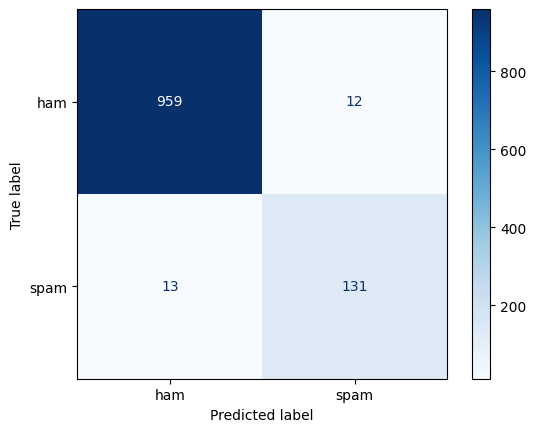

In [31]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap="Blues")

In [32]:
model.predict(["Hello, How are you?"])

array(['ham'], dtype='<U4')

In [37]:
model.predict(["You've won the lottery of $500000. Please click the below link to claim your price."])

array(['spam'], dtype='<U4')

In [41]:
import pickle
with open("email-classifier.pickle", "wb") as file:
    pickle.dump(model, file)